# Assignment 06 - Weather
Programming for Data Analytics, Atlantic Technological University
Autumn 2025  
Author: Susan Collins  

## Brief for this assignment

Create a notebook called assignment_6_Weather.ipynb

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

(This is different that the data I used in the lecture)

Plot:

    The temperature
    The mean temperature each day
    The mean temperature for each month

60% of the marks will be given for the above

For the last 40%

Plot:

    The Windspeed (there is data missing from this column)
    The rolling windspeed (say over 24 hours)
    The max windspeed for each day
    The monthly mean of the daily max windspeeds (yer I am being nasty here)

You do not need to over comment your code. Marks will be given for how nice the plots are.

## Part 1: Acquire Data

In [72]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [73]:
csv_url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"

# read in the csv file
df = pd.read_csv(csv_url, skiprows=23, parse_dates=['date'], index_col="date")

/var/folders/_s/9c81szls3z91q3yyzsykzzz00000gn/T/ipykernel_19169/3888767030.py:4: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_url, skiprows=23, parse_dates=['date'], index_col="date")
/var/folders/_s/9c81szls3z91q3yyzsykzzz00000gn/T/ipykernel_19169/3888767030.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(csv_url, skiprows=23, parse_dates=['date'], index_col="date")


In [74]:
df.head()
#df.info()


,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6


In [75]:
# Get mean temperature each day
# ref: https://www.geeksforgeeks.org/python/python-pandas-dataframe-resample/

df_mean_daily = df["temp"].resample("D").mean()
df_mean_monthly = df["temp"].resample("ME").mean()

# drop null values
df_mean_daily.dropna(inplace=True)
df_mean_monthly.dropna(inplace=True)

df_mean_monthly.head()



date
1996-04-30    11.500000
1996-07-31    12.650000
1996-08-31    12.946909
1996-09-30    12.174306
1996-10-31     9.614113
Name: temp, dtype: float64

### Plot the temperature

''

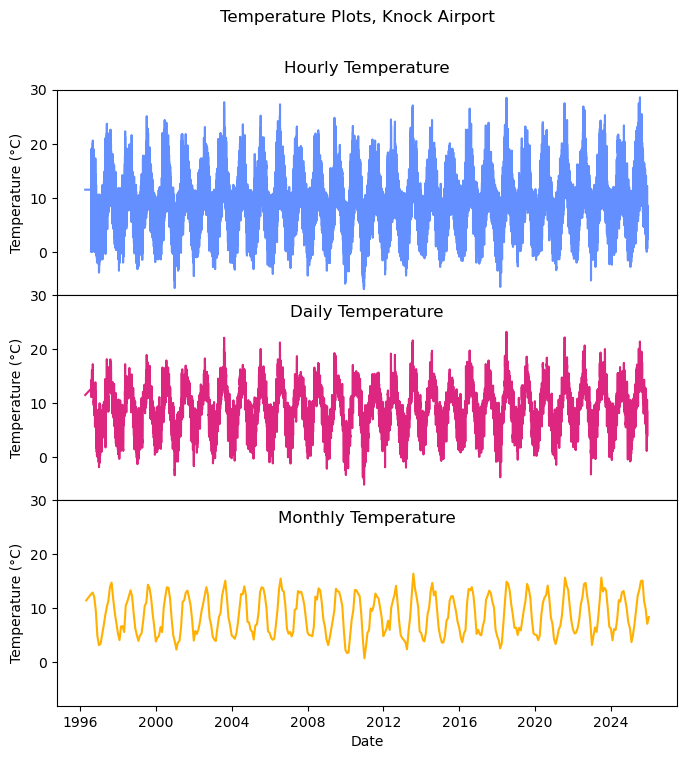

In [77]:
# Set up 3 subplots,
fig, ax = plt.subplots(3, 1, figsize=(8, 8), sharex='col', sharey=True, gridspec_kw={'hspace': 0}) 
fig.suptitle("Temperature Plots, Knock Airport")


plt.ylabel('Temperature (°C)')
plt.ylim(-8,30)

plt.subplot(3,1,1)
plt.title('Hourly Temperature', y=1.1, va="top")
plt.xlabel('')
plt.ylabel('Temperature (°C)')
sns.lineplot(data=df, x=df.index, y='temp', color="#648FFF")


plt.subplot(3,1,2)
plt.ylabel('Temperature (°C)')
ax[1].set_title('Daily Temperature', y=0.91, va="top")
sns.lineplot(data=df_mean_daily, color="#DC267F")


plt.subplot(3,1,3)
ax[2].set_xlabel('Date')
ax[2].set_title('Monthly Temperature', y=0.91, va="top")
sns.lineplot(data=df_mean_monthly, color="#FFB000")


;